This is the implementation notebook for [this article](https://medium.datadriveninvestor.com/why-we-use-log-returns-for-stock-returns-820cec4510ba)

Text(0, 0.5, 'Final Price')

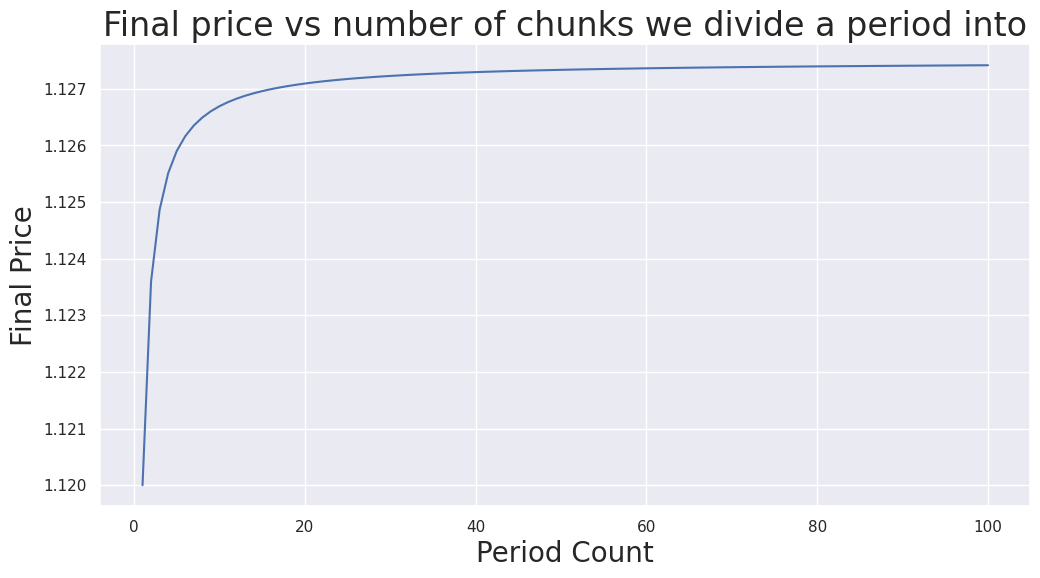

In [75]:
# import the usual suspects
import datetime as dt
import matplotlib.pyplot as plt
# import matplotlib as mpl
# import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import warnings

# mpl.rcParams['agg.path.chunksize'] = 1000000
%config Completer.use_jedi = False
warnings.filterwarnings('ignore')
sns.set()

# define our selection of chunks to split the period into
chunks = [x for x in range(1, 101)]
# define initial price, simple return
s0 = 1
r_s = 0.12
# define our final prices
sT = [s0*(1+r_s/x)**x for x in chunks]

# plot them
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(chunks, sT)
ax.set_title('Final price vs number of chunks we divide a period into', fontsize=24)
ax.set_xlabel('Period Count', fontsize=20)
ax.set_ylabel('Final Price', fontsize=20)

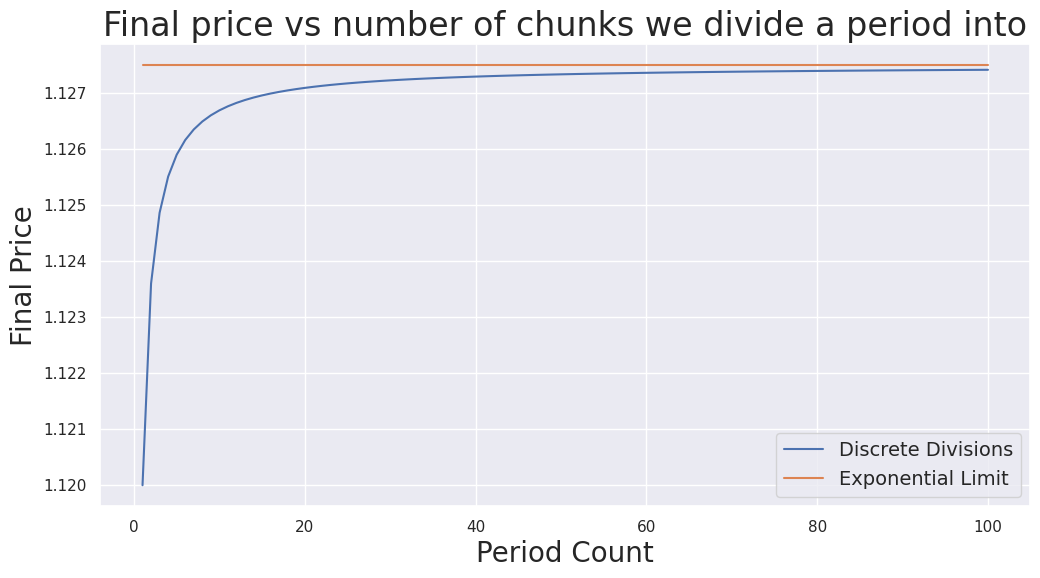

In [76]:
# plot them
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(chunks, sT, label='Discrete Divisions')
ax.plot(chunks, [s0*np.exp(r_s) for x in chunks], label='Exponential Limit')
ax.set_title('Final price vs number of chunks we divide a period into', fontsize=24)
ax.set_xlabel('Period Count', fontsize=20)
ax.set_ylabel('Final Price', fontsize=20)
ax.legend(fontsize=14);

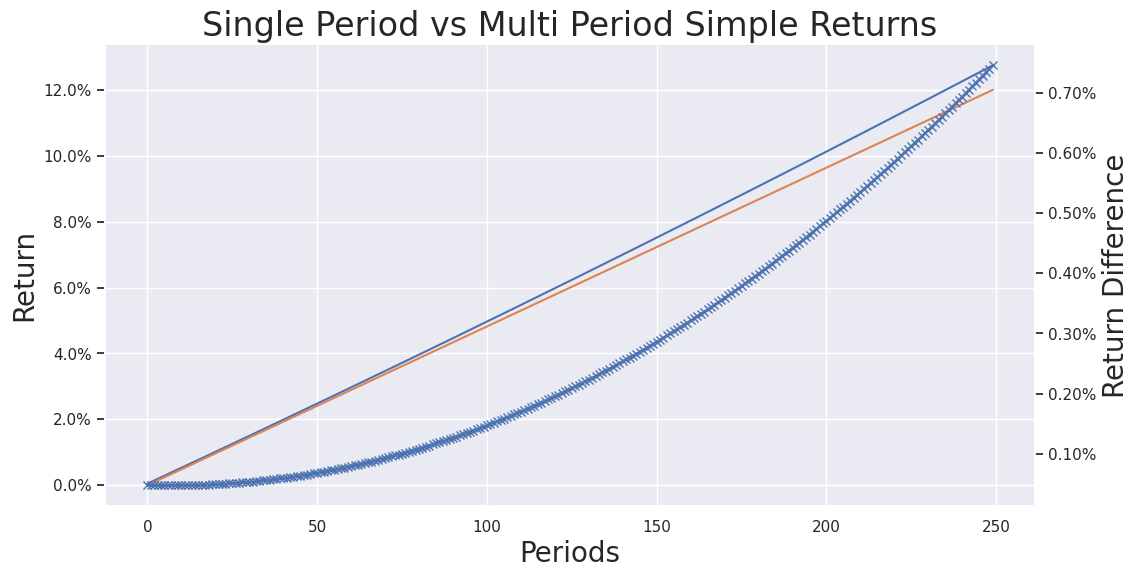

In [77]:
# define simple returns and compounded returns
single_period_rets = np.linspace(0, 1, 250) * r_s
multi_period_rets = np.cumprod([1+r_s/250 for x in range(1,251)]) - 1

# plot them
fig, ax = plt.subplots(figsize=(12,6))
ax2 = ax.twinx()

ax.plot([x for x in range(0, 250)], multi_period_rets)
ax.plot([x for x in range(0, 250)], single_period_rets)
ax2.plot([x for x in range(0, 250)], multi_period_rets - single_period_rets, marker='x')
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in ax2.get_yticks()])
ax2.grid(None)

ax.set_title('Single Period vs Multi Period Simple Returns', fontsize=24)
ax.set_xlabel('Periods', fontsize=20)
ax.set_ylabel('Return', fontsize=20)
ax2.set_ylabel('Return Difference', fontsize=20);

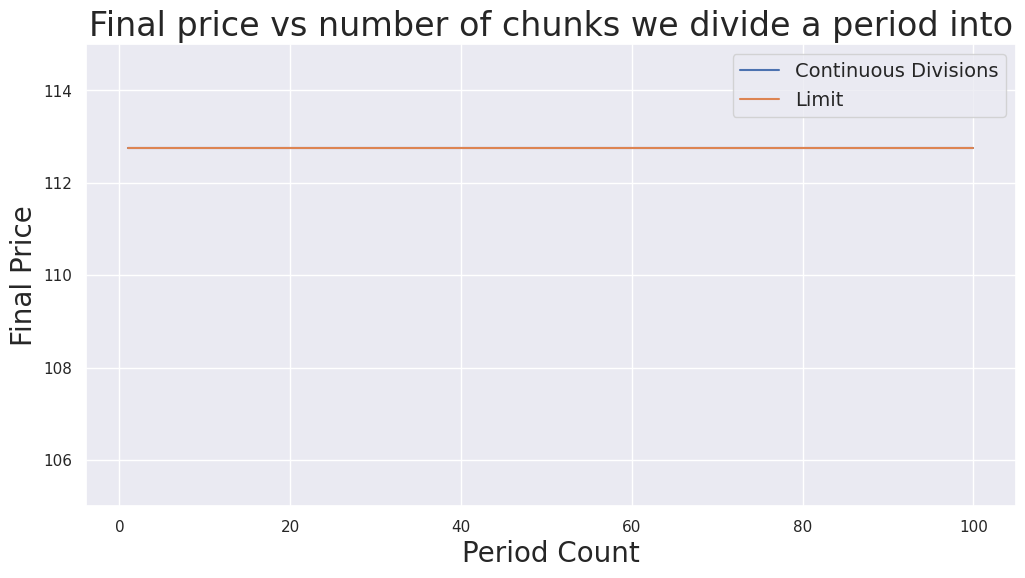

In [78]:
# plot them
fig, ax = plt.subplots(figsize=(12,6))
s0=100
ax.plot(chunks, [s0*np.exp(r_s/x)**x for x in chunks], label='Continuous Divisions')
ax.plot(chunks, [s0*np.exp(r_s) for x in chunks], label='Limit')
ax.set_title('Final price vs number of chunks we divide a period into', fontsize=24)
ax.set_xlabel('Period Count', fontsize=20)
ax.set_ylabel('Final Price', fontsize=20)
ax.set_ylim(105,115)
ax.legend(fontsize=14);

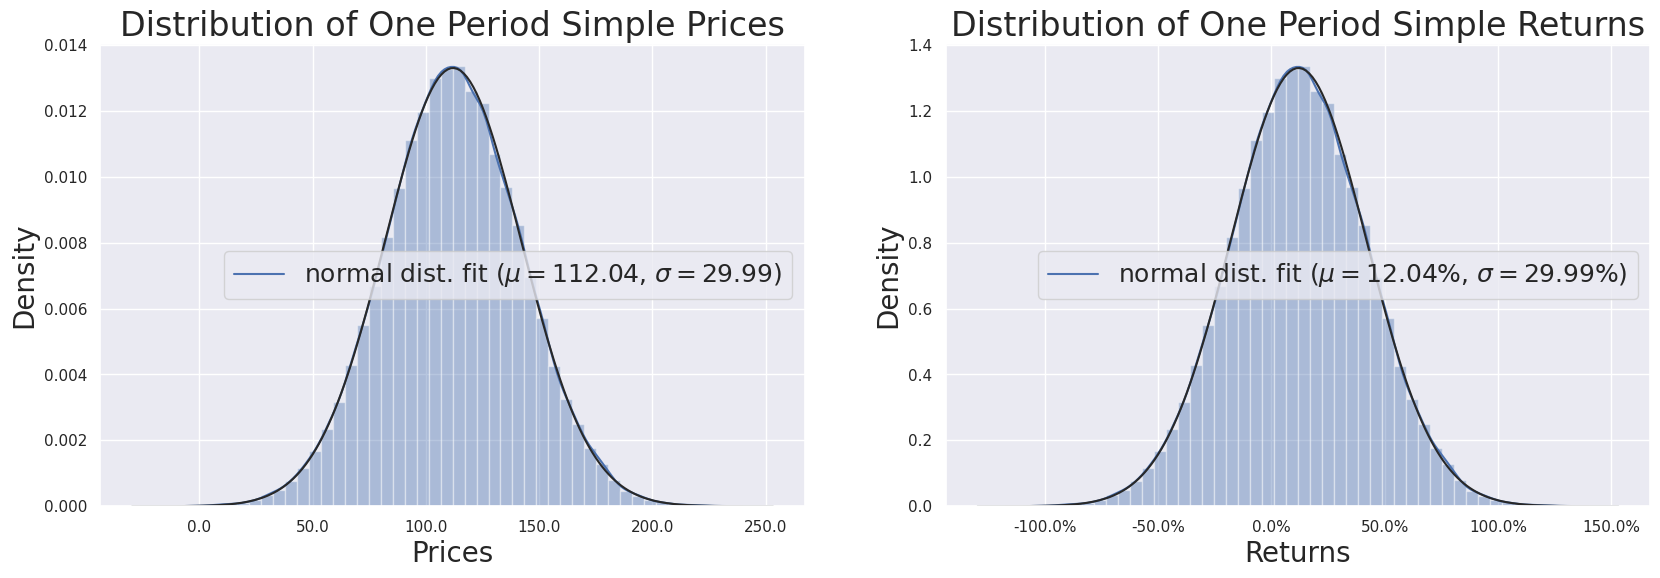

In [82]:

# set starting stock price, retun, std dev and days per year
s0 = 100
r = 0.12
sigma = 0.30
paths = 100000

# set up numpy PCG PRNG
rng = np.random.default_rng(seed=123)
norm_draws = rng.normal(size=paths)

# compute our end of (single) period prices
simp_one_period_prices = [s0 * (1 + r) + s0 * x * sigma for x in norm_draws]
# compute simple returns based on final prices
simp_one_period_rets = [(x - s0)/s0 for x in simp_one_period_prices]

# plot the distribution of final prices
# create the figure
fig, ax = plt.subplots(ncols=2, figsize=(20,6))

# fit a dist plot
sns.distplot(simp_one_period_prices, fit=stats.norm, ax=ax[0]);
sns.distplot(simp_one_period_rets, fit=stats.norm, ax=ax[1]);

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(simp_one_period_prices)
ax[0].set_title('Distribution of One Period Simple Prices', fontsize=24)
ax[0].set_xlabel('Prices', fontsize=20)
ax[0].set_ylabel('Density', fontsize=20)
ax[0].set_xticklabels(['{:,.1f}'.format(x) for x in ax[0].get_xticks()]);
ax[0].legend(["normal dist. fit ($\mu=${0:,.2f}, $\sigma=${1:,.2f})".format(mu, s)], fontsize=18);

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(simp_one_period_rets)
ax[1].set_title('Distribution of One Period Simple Returns', fontsize=24)
ax[1].set_xlabel('Returns', fontsize=20)
ax[1].set_ylabel('Density', fontsize=20)
ax[1].set_xticklabels(['{:,.1%}'.format(x) for x in ax[1].get_xticks()]);
ax[1].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu, s)], fontsize=18);

In [ ]:
# define day count to sub-divide period
days = 250
paths = 100000
# define 10,000 paths of 250 steps
norm_draws = [rng.normal(size=days) for x in range(paths)]

# define our daily simple returns
daily_simp_rets = [1 + r/days + sigma/(days**0.5)*x for x in norm_draws]
# add in starting point to the return sequence
daily_simp_rets = [np.insert(x, 0, 1) for x in daily_simp_rets]
# compute our cumulative returns using cumprod as they are not additive
simple_rets = [np.cumprod(x) for x in daily_simp_rets]

fig, ax = plt.subplots(figsize=(25,12))

for p in simple_rets[:500]:
    ax.plot([z for z in range(0, days+1)], p, linewidth=0.5)

ax.set_title('Simple Return Paths', fontsize=24)
ax.set_xlabel('Days', fontsize=20)
ax.set_ylabel('Simple Returns', fontsize=20)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()]);

Output hidden; open in https://colab.research.google.com to view.

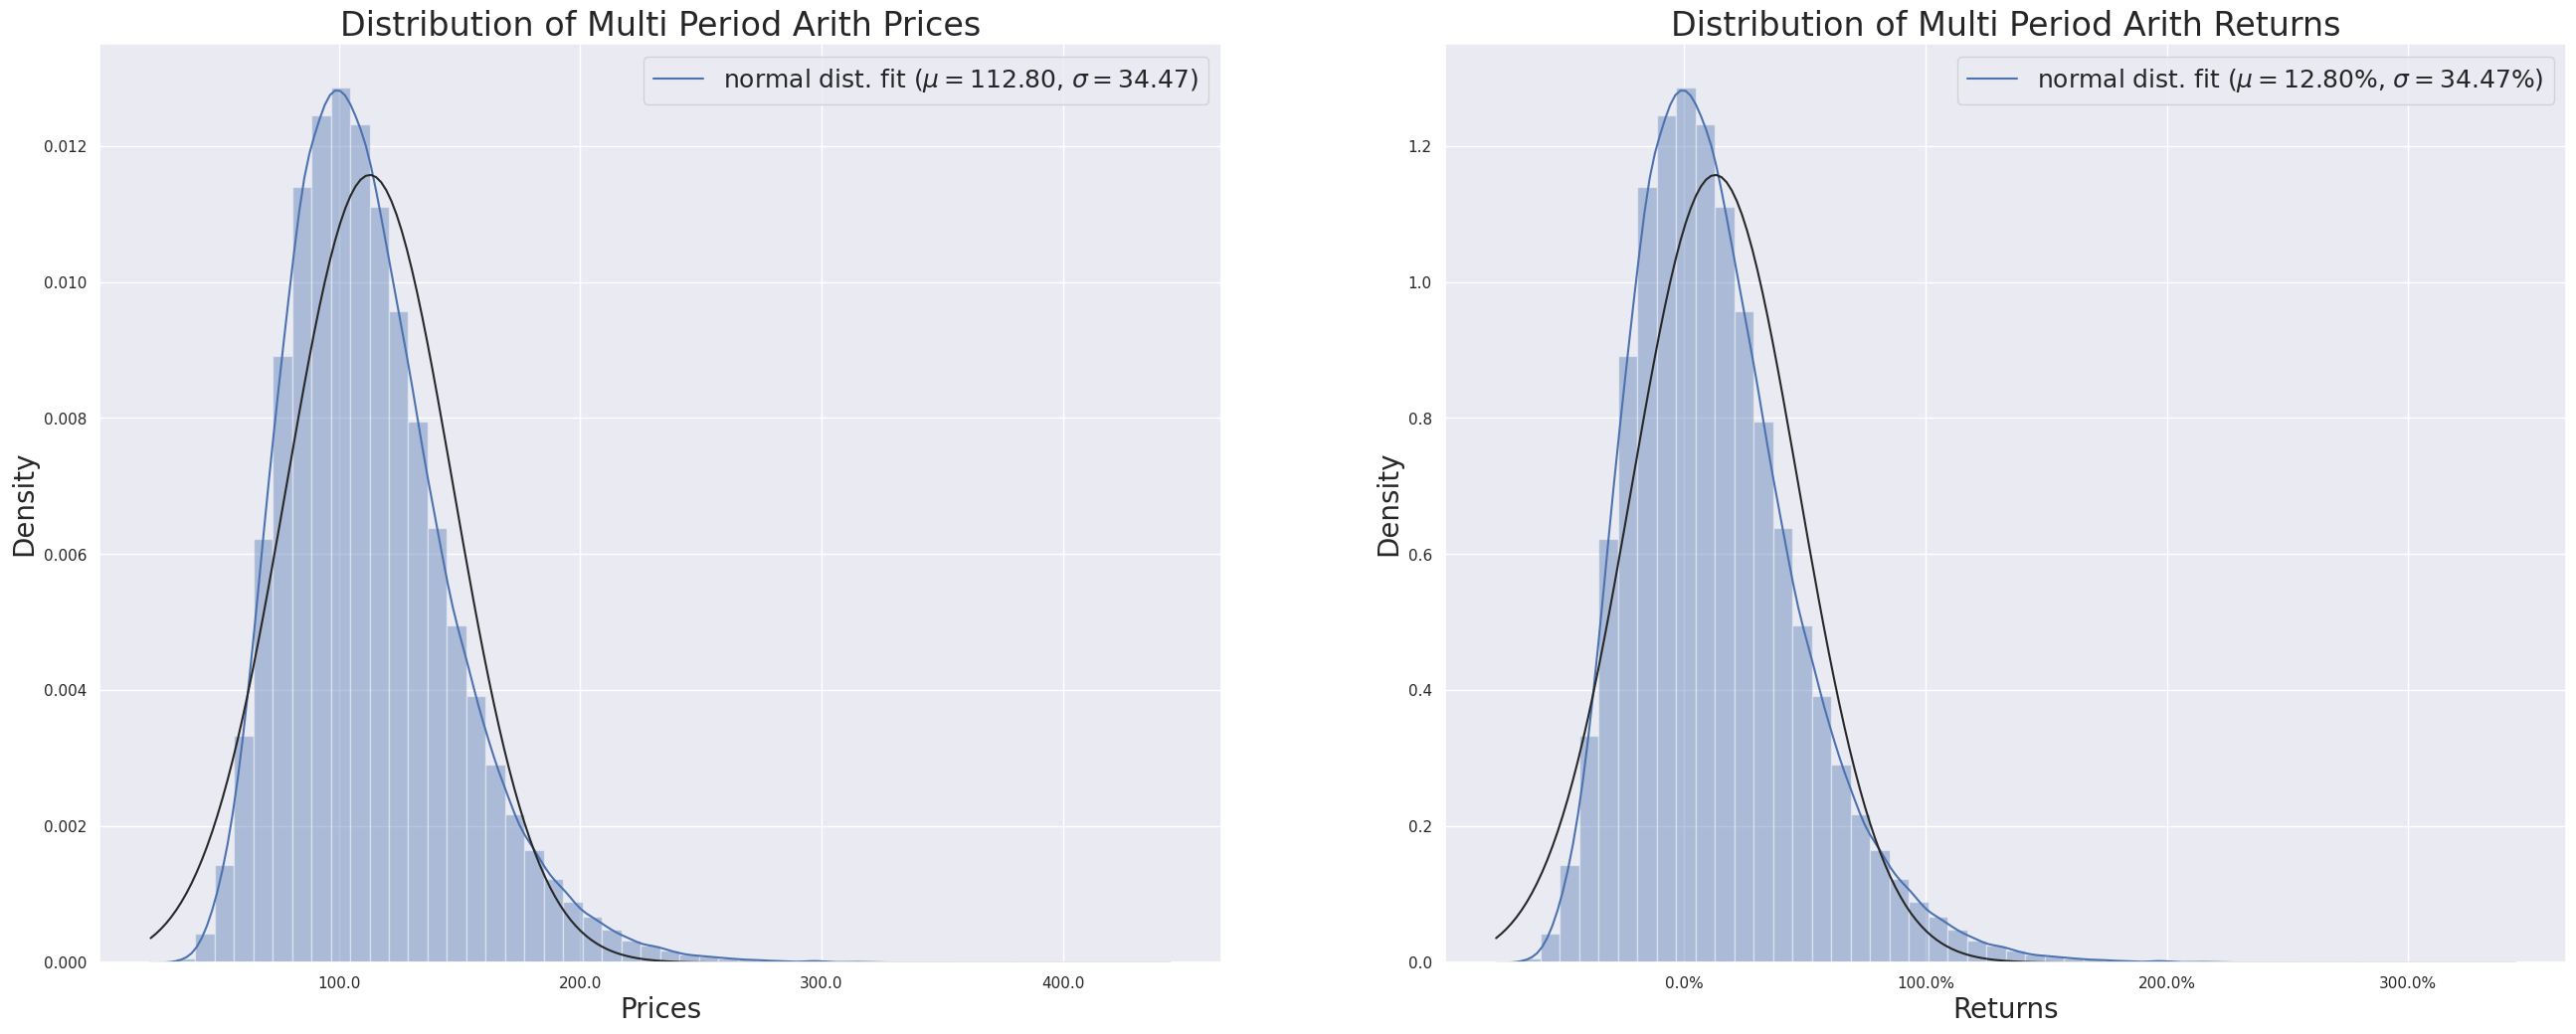

In [ ]:
simp_multi_period_prices = [s0*x for x in simple_rets]
simp_multi_period_rets = [x[-1]/s0 - 1 for x in simp_multi_period_prices]

# plot the distribution of final prices
# create the figure
fig, ax = plt.subplots(ncols=2, figsize=(32,12))

# fit a dist plot
sns.distplot([x[-1] for x in simp_multi_period_prices], fit=stats.norm, ax=ax[0]);
sns.distplot(simp_multi_period_rets, fit=stats.norm, ax=ax[1]);

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit([x[-1] for x in simp_multi_period_prices])
ax[0].set_title('Distribution of Multi Period Arith Prices', fontsize=24)
ax[0].set_xlabel('Prices', fontsize=20)
ax[0].set_ylabel('Density', fontsize=20)
ax[0].set_xticklabels(['{:,.1f}'.format(x) for x in ax[0].get_xticks()]);
ax[0].legend(["normal dist. fit ($\mu=${0:,.2f}, $\sigma=${1:,.2f})".format(mu, s)], fontsize=18);

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(simp_multi_period_rets)
ax[1].set_title('Distribution of Multi Period Arith Returns', fontsize=24)
ax[1].set_xlabel('Returns', fontsize=20)
ax[1].set_ylabel('Density', fontsize=20)
ax[1].set_xticklabels(['{:,.1%}'.format(x) for x in ax[1].get_xticks()]);
ax[1].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu, s)], fontsize=18);

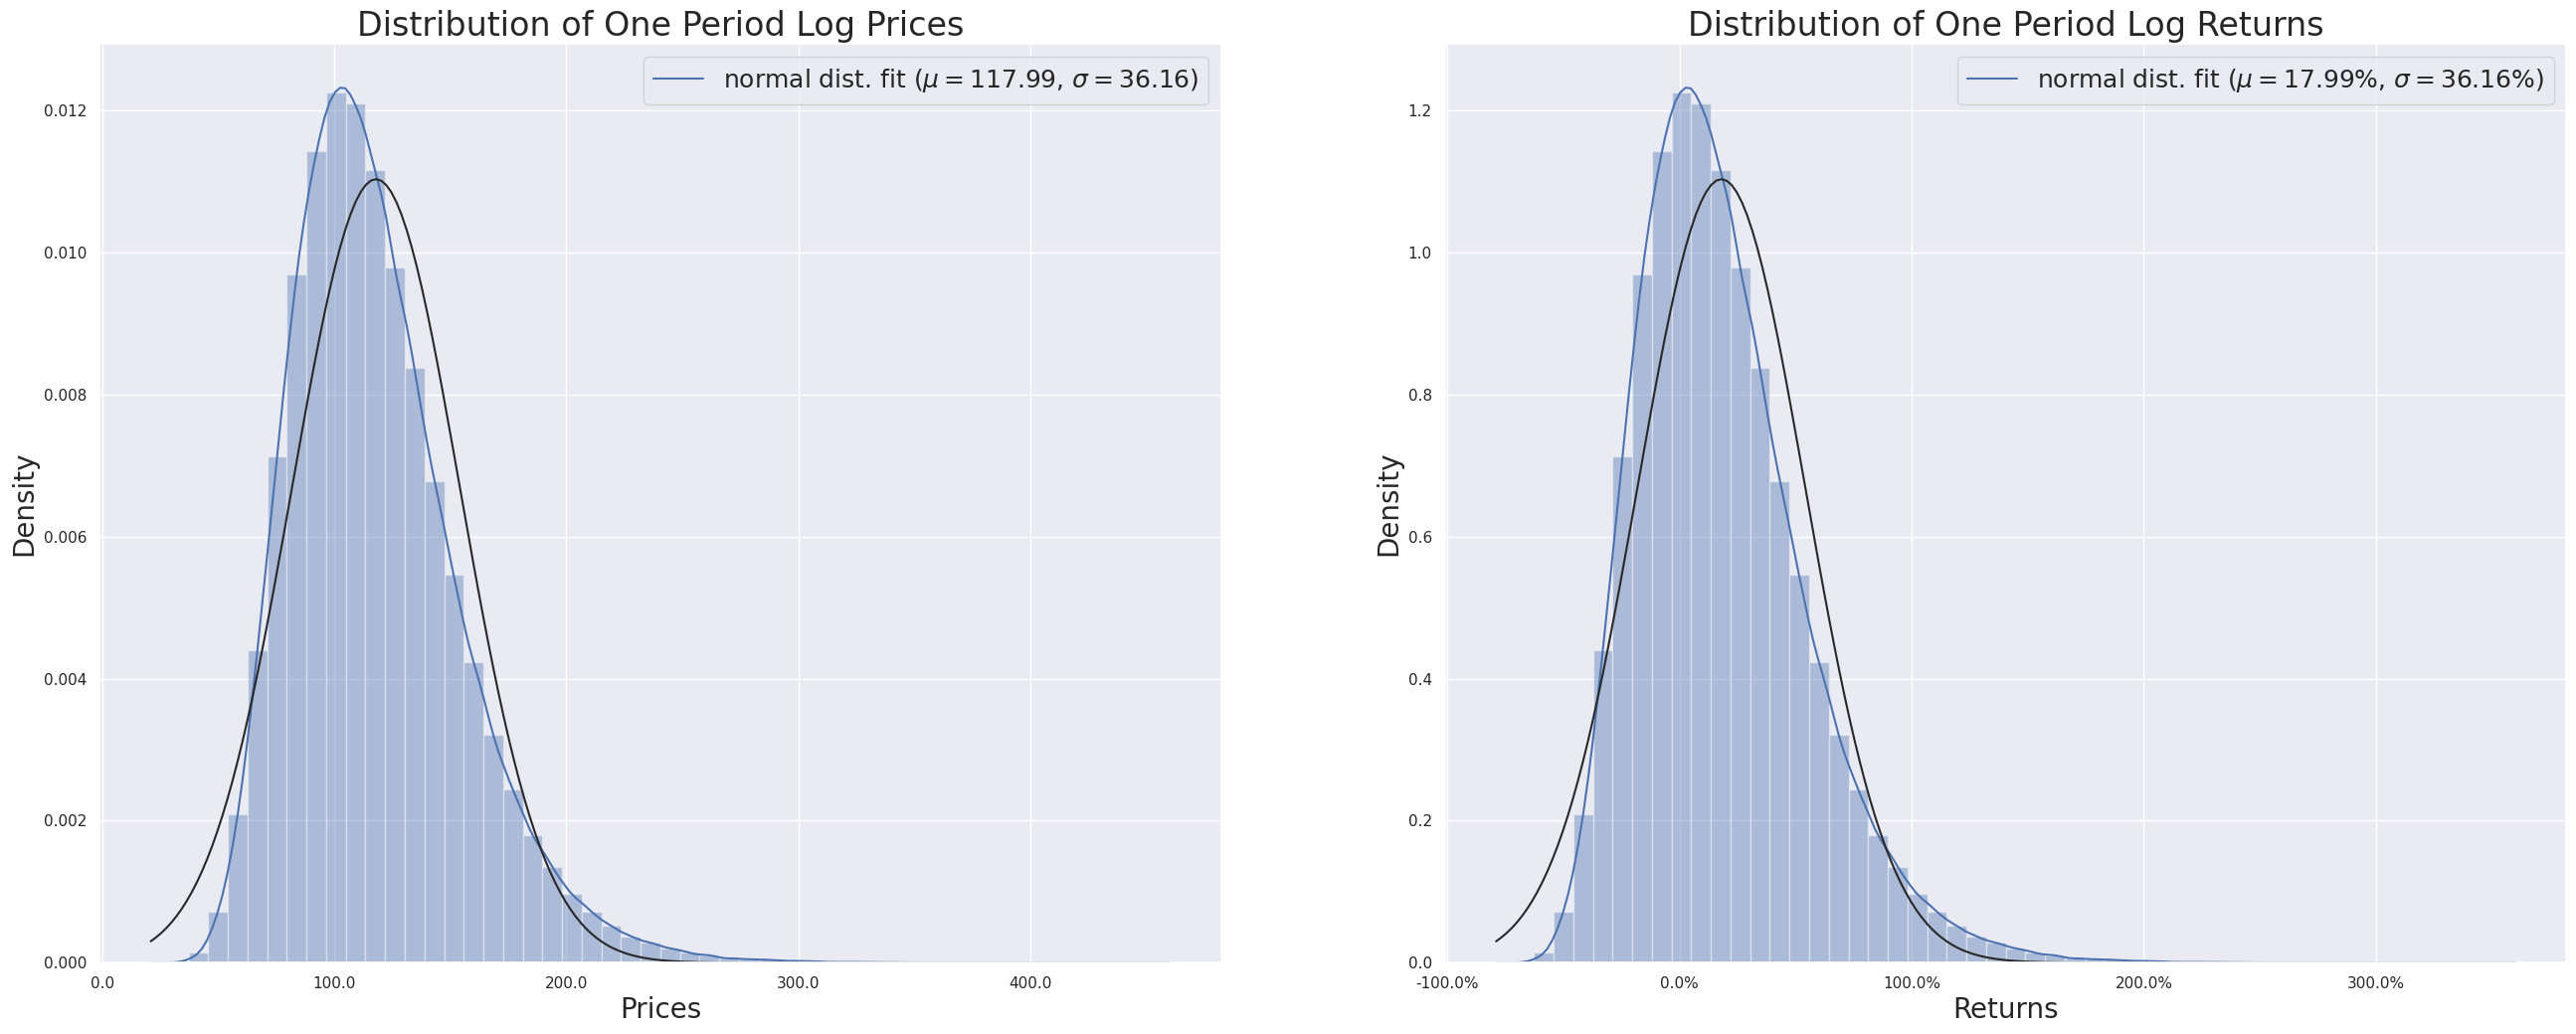

In [ ]:
# set starting stock price, retun, std dev and days per year
s0 = 100
r = 0.12
sigma = 0.30
paths = 500000

# draw random numbers form std normal dist
norm_draws = rng.normal(size=paths)

log_one_period_prices = [s0 * np.exp(r + x*sigma) for x in norm_draws]
log_one_period_rets = [(x - s0)/s0 for x in log_one_period_prices]
log_one_period_rets_ln = [np.log(x/s0) for x in log_one_period_prices]

# plot the distribution of final prices
# create the figure
fig, ax = plt.subplots(ncols=2, figsize=(32,12))

# fit a dist plot
sns.distplot(log_one_period_prices, fit=stats.norm, ax=ax[0]);
sns.distplot(log_one_period_rets, fit=stats.norm, ax=ax[1]);
# sns.distplot(log_one_period_rets_ln, fit=stats.norm, ax=ax[2]);

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(log_one_period_prices)
ax[0].set_title('Distribution of One Period Log Prices', fontsize=24)
ax[0].set_xlabel('Prices', fontsize=20)
ax[0].set_ylabel('Density', fontsize=20)
ax[0].set_xticklabels(['{:,.1f}'.format(x) for x in ax[0].get_xticks()]);
ax[0].legend(["normal dist. fit ($\mu=${0:,.2f}, $\sigma=${1:,.2f})".format(mu, s)], fontsize=18);

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(log_one_period_rets)
ax[1].set_title('Distribution of One Period Log Returns', fontsize=24)
ax[1].set_xlabel('Returns', fontsize=20)
ax[1].set_ylabel('Density', fontsize=20)
ax[1].set_xticklabels(['{:,.1%}'.format(x) for x in ax[1].get_xticks()]);
ax[1].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu, s)], fontsize=18);


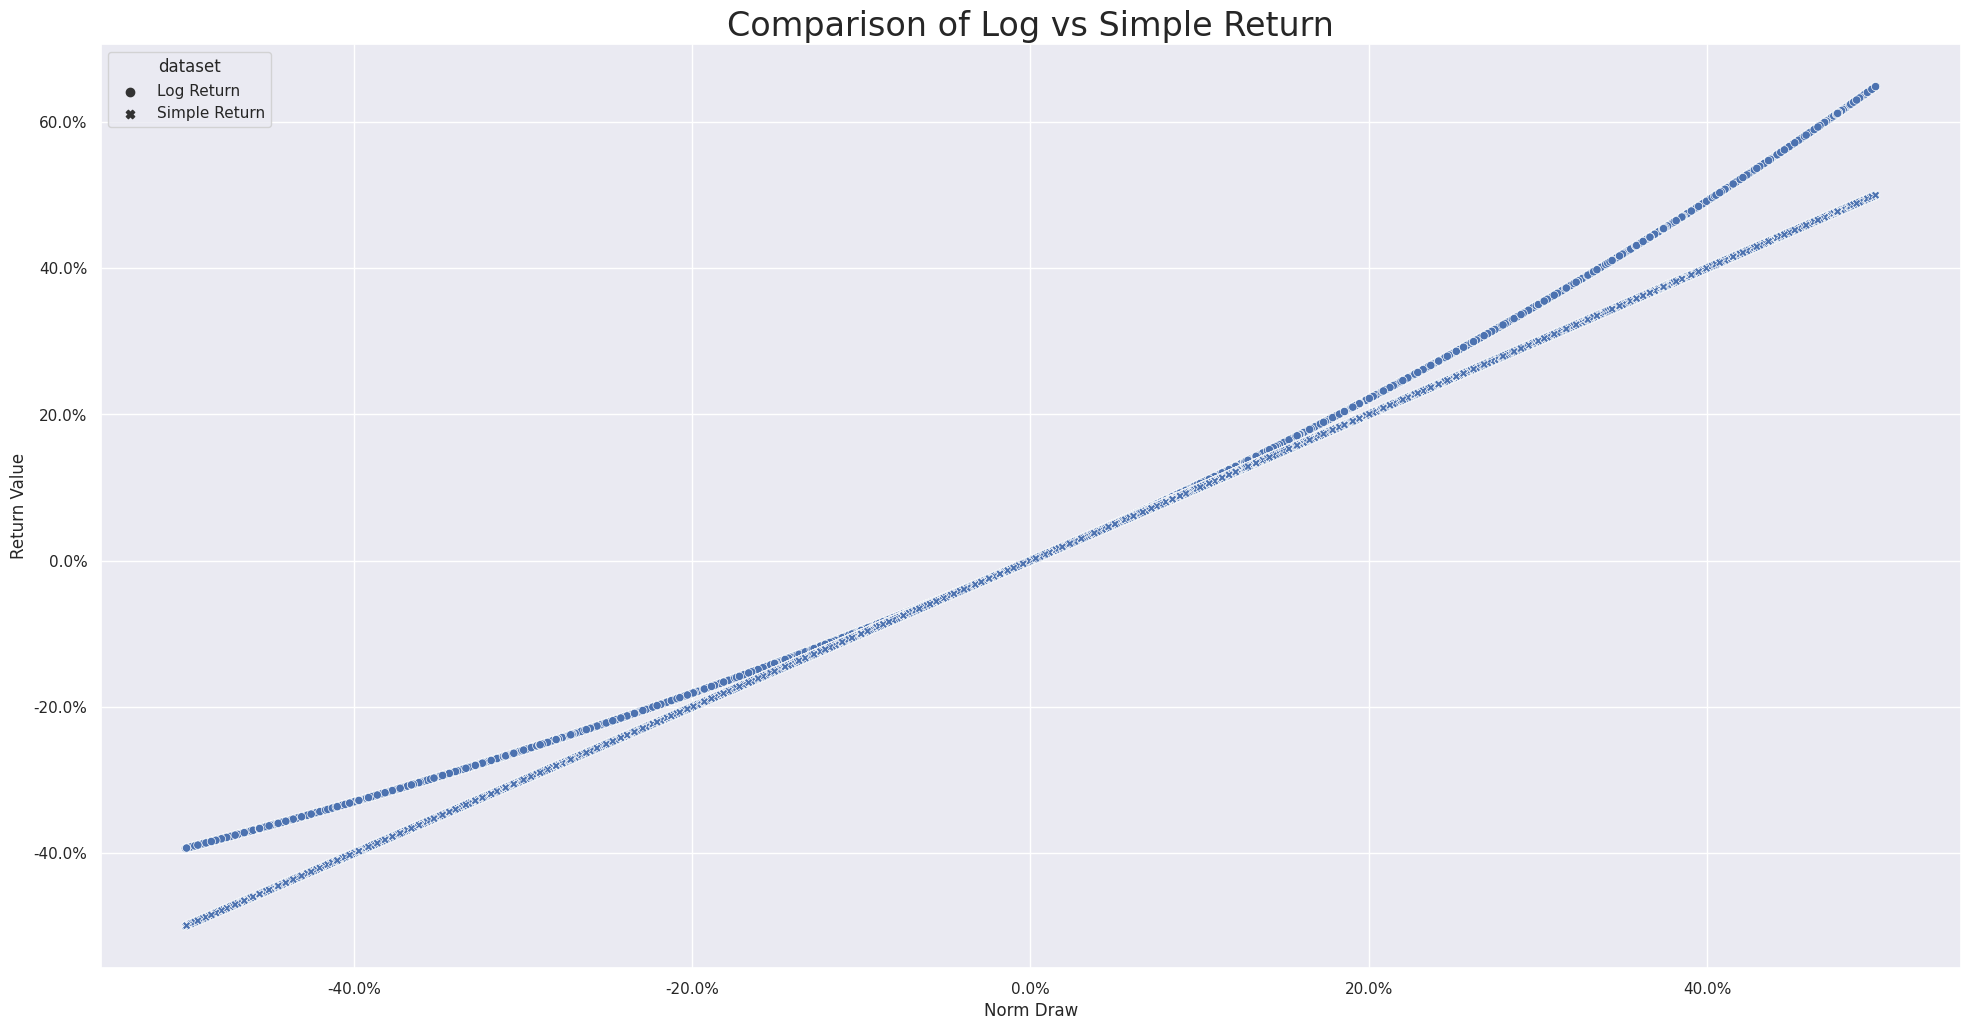

In [ ]:
# get draws from norm dist that are small
norm_draws = rng.normal(size=paths)
sample_draws = [x for x in norm_draws if abs(x) < 0.5][:10000]

# convert to dataframe
log_draws = pd.DataFrame({'Norm Draw': sample_draws, 'Return Value': [np.exp(x)-1 for x in sample_draws]})
simple_draws = pd.DataFrame({'Norm Draw': sample_draws, 'Return Value': sample_draws})
all_draws = pd.concat([log_draws.assign(dataset='Log Return'), simple_draws.assign(dataset='Simple Return')])

# plot
fig, ax = plt.subplots(figsize=(24, 12))

sns.scatterplot(data=all_draws, x='Norm Draw', y='Return Value', style='dataset')
ax.set_title('Comparison of Log vs Simple Return', fontsize=24)
ax.set_xticklabels(['{:,.1%}'.format(x) for x in ax.get_xticks()])
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()]);

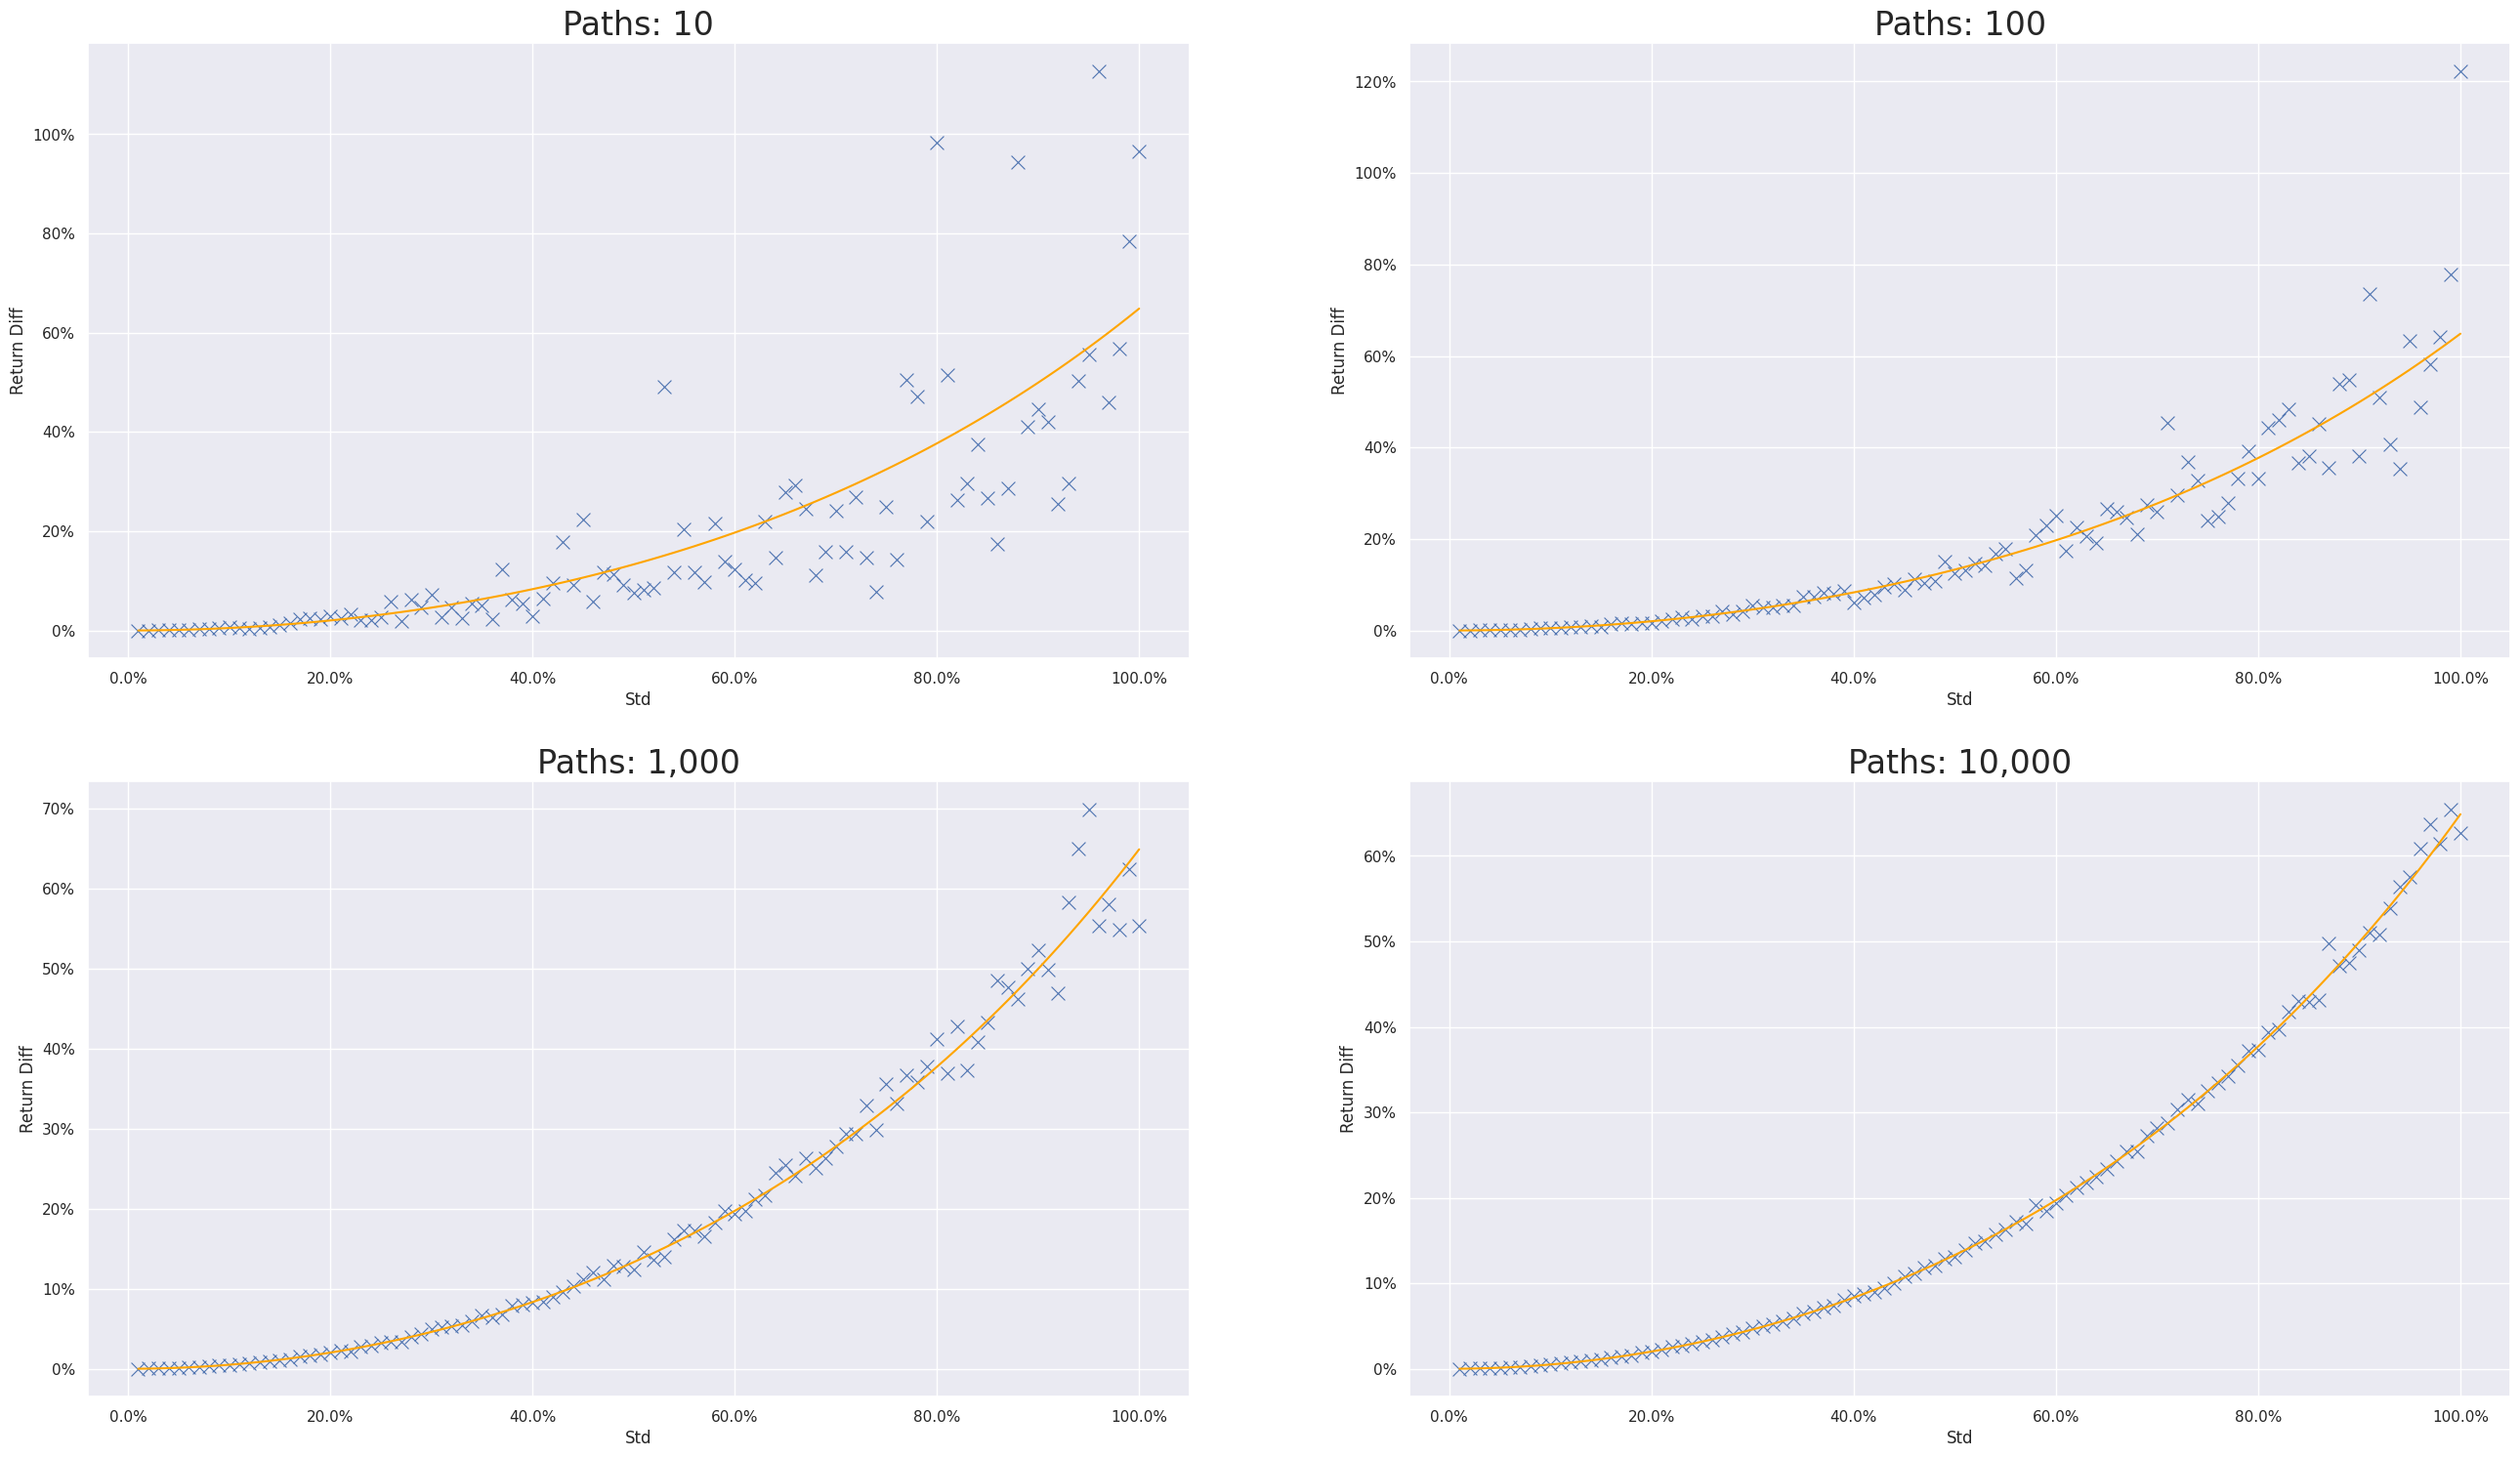

In [ ]:
r = 0.00
path_list = [10, 100, 1000, 10000]
std_devs = np.linspace(0.01, 1, 100)

path_rets = {}
# for each set of paths
for p in path_list:
    ret_diff = []
    for v in std_devs:
        # draw from normal dist
        draws = rng.normal(size=p)
        # compute arithmetic process returns
        arith = [r + v*x for x in draws]
        # compute geo process returns
        geo = [np.exp(r + v*x) - 1 for x in draws]
        # compute mean returns
        arith_mean = np.mean(arith)
        geo_mean = np.mean(geo)
        ret_diff.append({'Return Diff': geo_mean - arith_mean, 'Std Dev': np.std(arith), 'Geo Mean': geo_mean, 'Arith Mean': arith_mean, 'Std': v})
    path_rets[p] = pd.DataFrame(ret_diff)

# plot our 2x2 grid and reshape the axes
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(32,18))
axes = axes.reshape(-1)

for p, rets in path_rets.items():
    # sort rets
    rets = rets.sort_values('Std Dev')
    # get ax
    ax = axes[list(path_rets.keys()).index(p)]
    # plot our return differences
    sns.scatterplot(data=rets, x='Std', y='Return Diff', ax=ax, marker='x', s=100)
    # compute theoretical line
    ret_adj = [0.5 * x**2 for x in std_devs]
    ax.plot(std_devs, [np.exp(0.5 * x**2)-1 for x in std_devs], color='orange')
    ax.set_title('Paths: {:,.0f}'.format(p), fontsize=24)
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
    ax.set_xticklabels(['{:,.1%}'.format(x) for x in ax.get_xticks()])

In [ ]:
# define our setup
r = 0.12
sigma = 0.30
paths = 100000
days = 250

norm_draws = [rng.normal(size=days) for x in range(paths)]

# define our returns
daily_log_rets = [r/days + sigma/(days**0.5) * x for x in norm_draws]
# define cum log returns by adding
log_rets = [np.cumsum(x) for x in daily_log_rets]
# exponentiate and multiply by s0 to get price series
log_prices = s0*np.exp(log_rets)

fig, ax = plt.subplots(figsize=(25,12))

for p in log_prices[:500]:
    ax.plot([z for z in range(1, days+1)], p, linewidth=0.5)

ax.set_title('Log Return Paths', fontsize=24)
ax.set_xlabel('Days', fontsize=20)
ax.set_ylabel('Final Price', fontsize=20);
# ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()]);

Output hidden; open in https://colab.research.google.com to view.

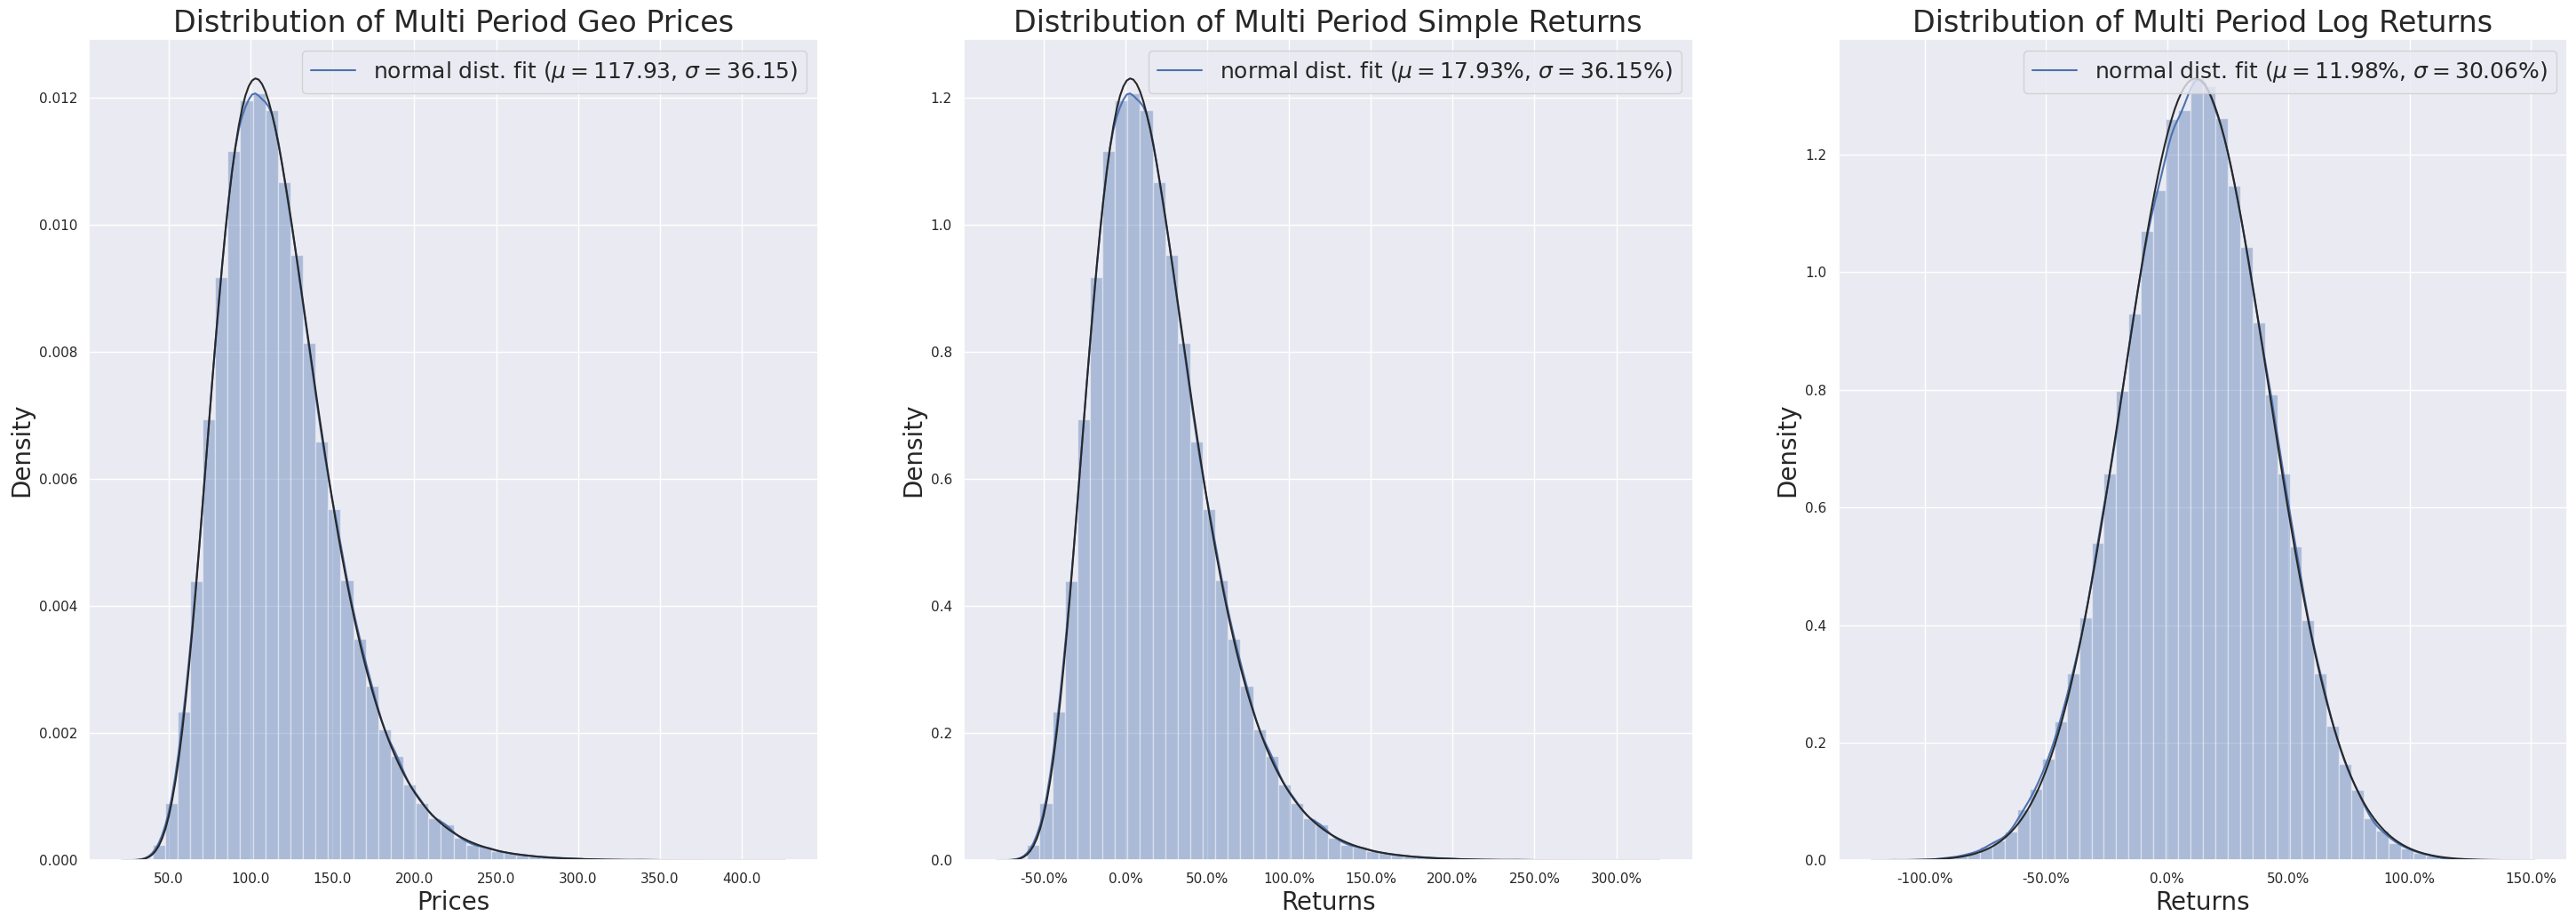

In [ ]:
log_multi_period_prices = [x[-1] for x in log_prices]
log_multi_period_rets = [x/s0 - 1 for x in log_multi_period_prices]
log_multi_period_rets_log = [np.log(x/s0) for x in log_multi_period_prices]

# plot the distribution of final prices
# create the figure
fig, ax = plt.subplots(ncols=3, figsize=(36,12))

# fit a dist plot
sns.distplot(log_multi_period_prices, fit=stats.lognorm, ax=ax[0]);
sns.distplot(log_multi_period_rets, fit=stats.lognorm, ax=ax[1]);
sns.distplot(log_multi_period_rets_log, fit=stats.lognorm, ax=ax[2]);

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(log_multi_period_prices)
ax[0].set_title('Distribution of Multi Period Geo Prices', fontsize=24)
ax[0].set_xlabel('Prices', fontsize=20)
ax[0].set_ylabel('Density', fontsize=20)
ax[0].set_xticklabels(['{:,.1f}'.format(x) for x in ax[0].get_xticks()]);
ax[0].legend(["normal dist. fit ($\mu=${0:,.2f}, $\sigma=${1:,.2f})".format(mu, s)], fontsize=18);

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(log_multi_period_rets)
ax[1].set_title('Distribution of Multi Period Simple Returns', fontsize=24)
ax[1].set_xlabel('Returns', fontsize=20)
ax[1].set_ylabel('Density', fontsize=20)
ax[1].set_xticklabels(['{:,.1%}'.format(x) for x in ax[1].get_xticks()]);
ax[1].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu, s)], fontsize=18);

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(log_multi_period_rets_log)
ax[2].set_title('Distribution of Multi Period Log Returns', fontsize=24)
ax[2].set_xlabel('Returns', fontsize=20)
ax[2].set_ylabel('Density', fontsize=20)
ax[2].set_xticklabels(['{:,.1%}'.format(x) for x in ax[2].get_xticks()]);
ax[2].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu, s)], fontsize=18);

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Get the data from Yahoo Finance
ticker = '^SPX'
start_date = '1900-09-15'
end_date = '2021-10-02'
data = yf.download(ticker, start_date, end_date)['Close']

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df_spx = pd.DataFrame(data)

In [ ]:
df_spx = df_spx.rename(columns={"Close": "SPX"})
# define simple and log returns
df_spx['simple'] = df_spx['SPX'] / df_spx['SPX'].shift(1) - 1
df_spx['log'] = np.log(df_spx['SPX'] / df_spx['SPX'].shift(1))
# drop na and show tail
df_spx = df_spx.dropna()
df_spx.tail()

,SPX,simple,log
Date,,,
2021-09-27,4443.109863,-0.002776,-0.002780
2021-09-28,4352.629883,-0.020364,-0.020574
2021-09-29,4359.459961,0.001569,0.001568
2021-09-30,4307.540039,-0.011910,-0.011981
2021-10-01,4357.040039,0.011491,0.011426


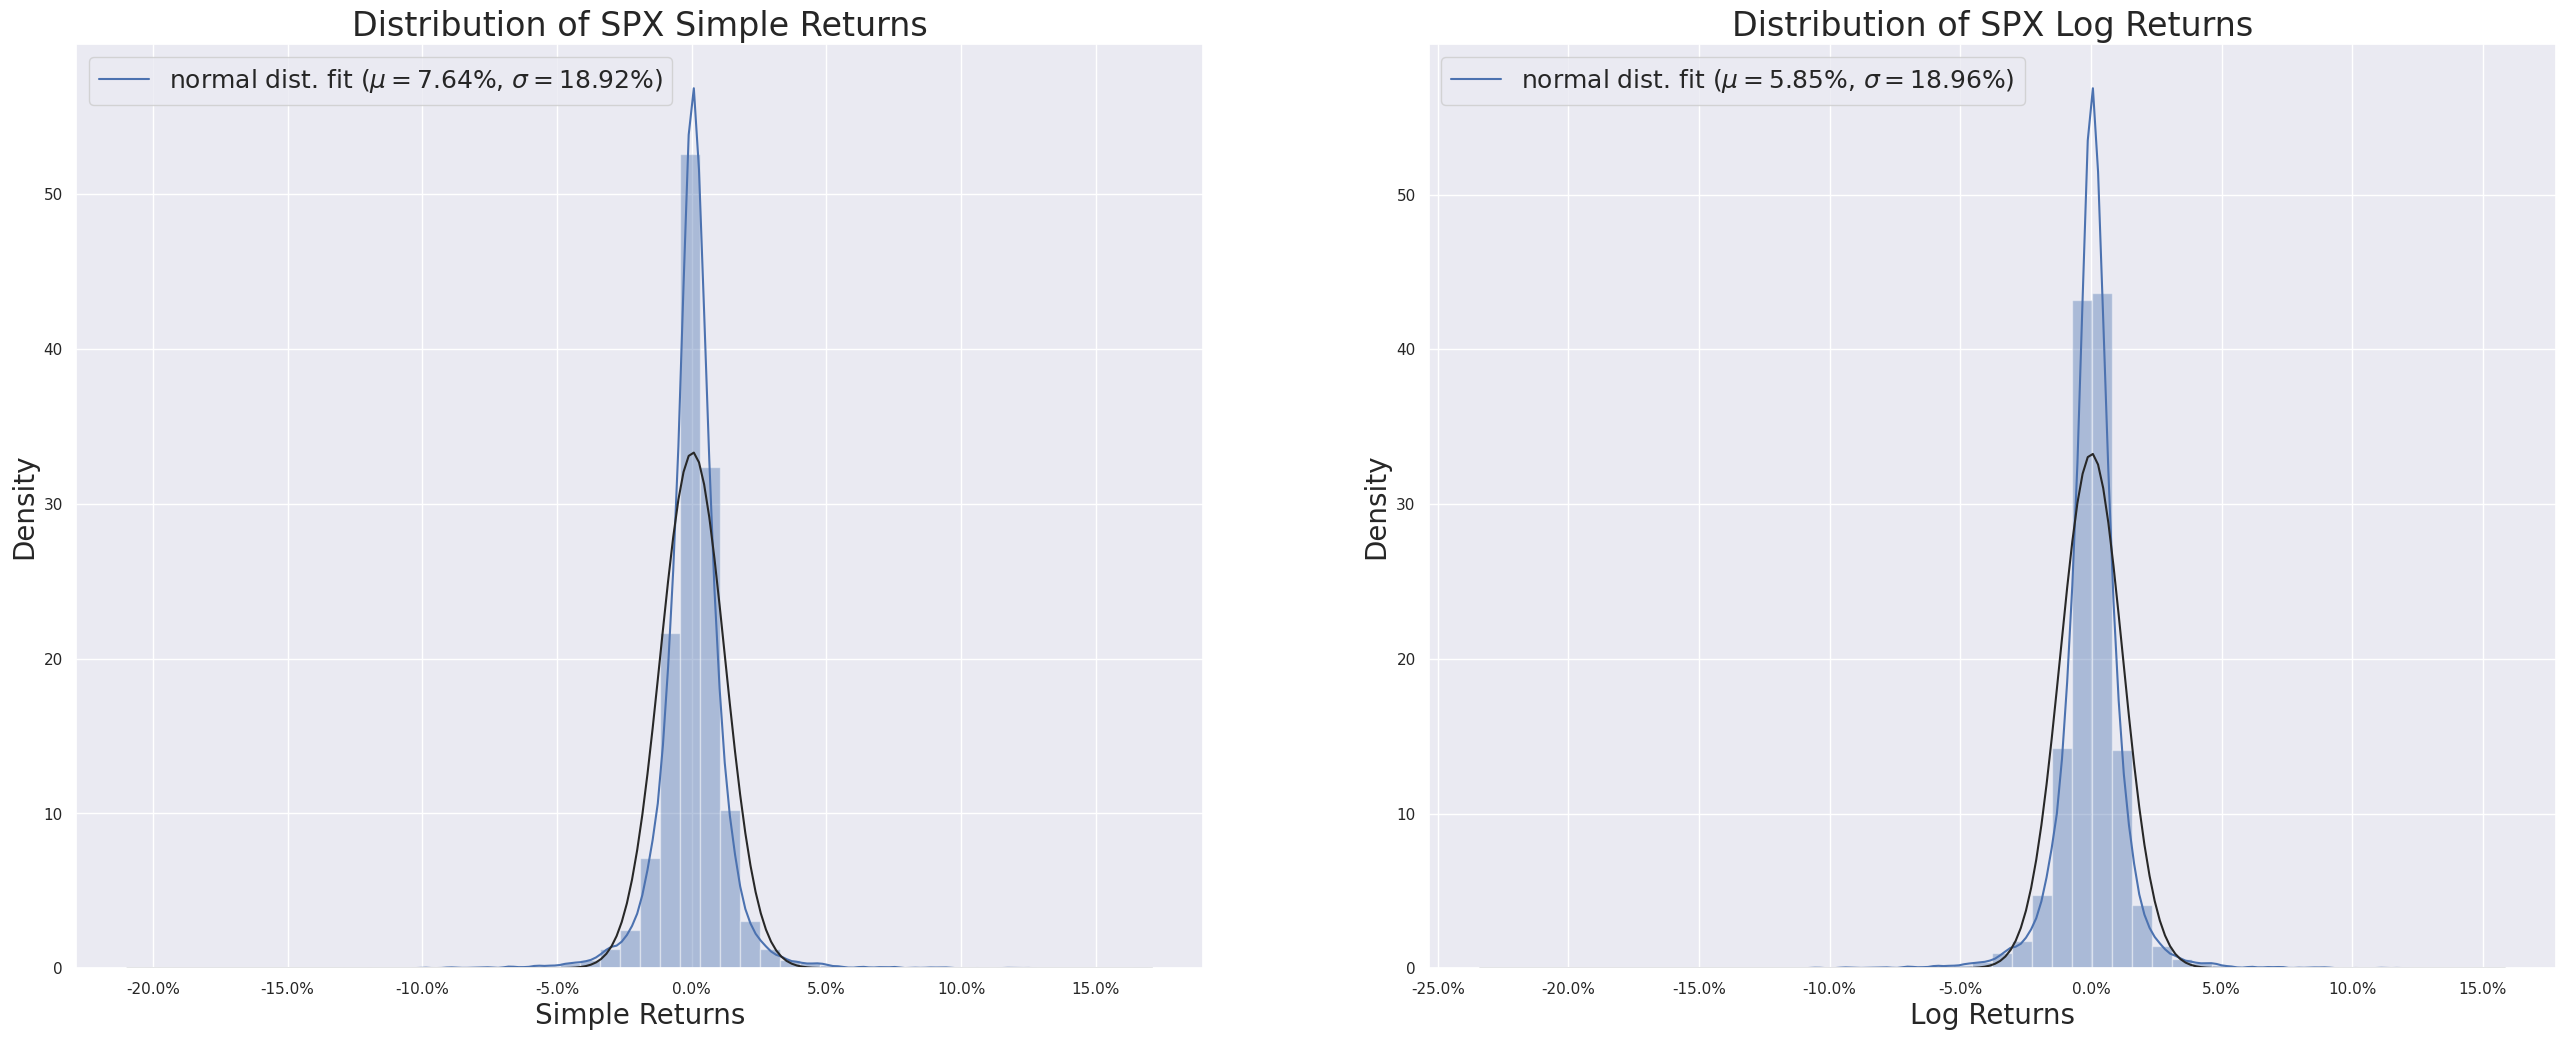

In [ ]:
# plot the distribution of returns
# create the figure
fig, ax = plt.subplots(ncols=2, figsize=(32,12))

# fit a dist plot
sns.distplot(df_spx['simple'], fit=stats.norm, ax=ax[0]);
sns.distplot(df_spx['log'], fit=stats.norm, ax=ax[1]);

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(df_spx['simple'])
ax[0].set_title('Distribution of SPX Simple Returns', fontsize=24)
ax[0].set_xlabel('Simple Returns', fontsize=20)
ax[0].set_ylabel('Density', fontsize=20)
ax[0].set_xticklabels(['{:,.1%}'.format(x) for x in ax[0].get_xticks()]);
ax[0].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu*days, s*np.sqrt(days))], fontsize=18);

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(df_spx['log'])
ax[1].set_title('Distribution of SPX Log Returns', fontsize=24)
ax[1].set_xlabel('Log Returns', fontsize=20)
ax[1].set_ylabel('Density', fontsize=20)
ax[1].set_xticklabels(['{:,.1%}'.format(x) for x in ax[1].get_xticks()]);
ax[1].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu*days, s*np.sqrt(days))], fontsize=18);

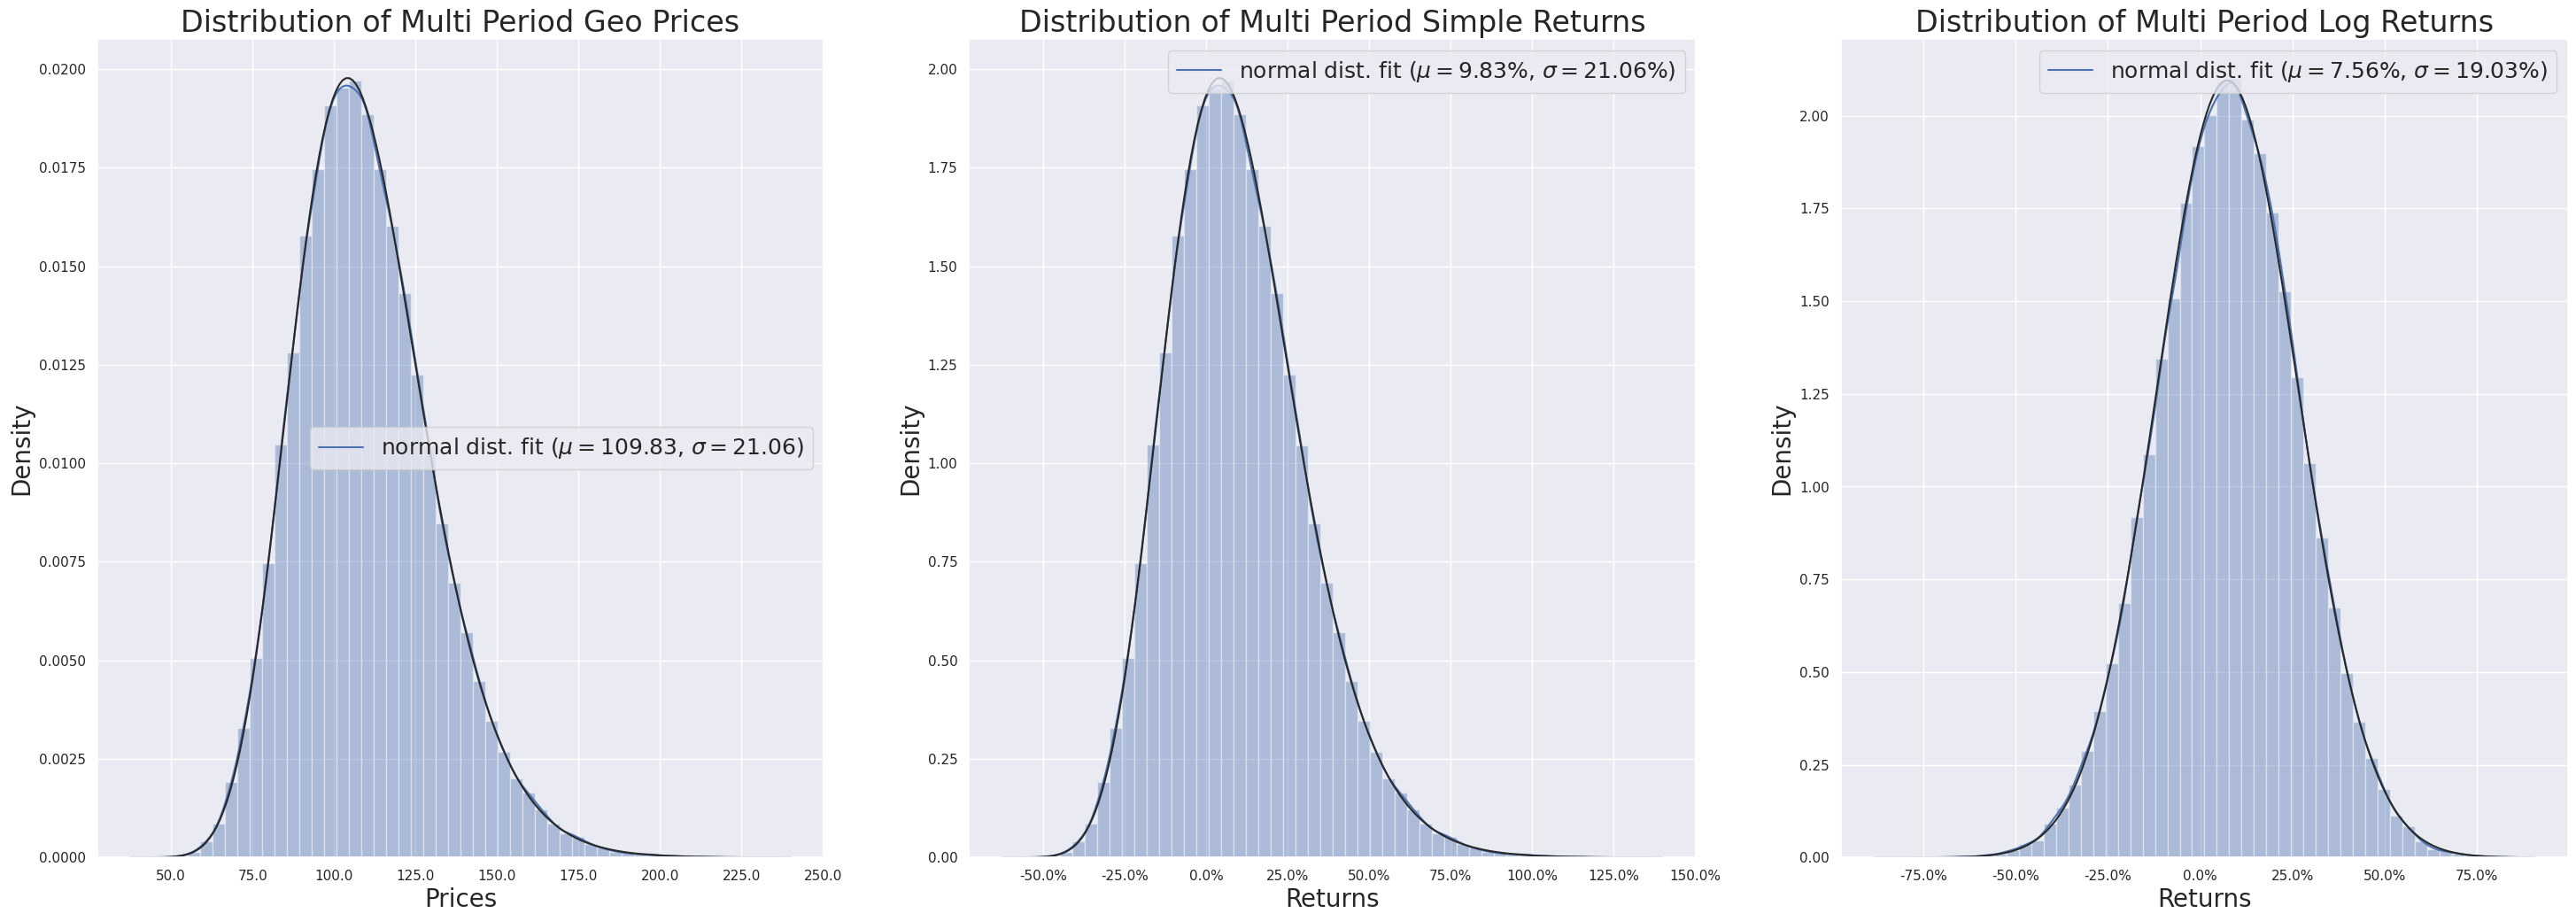

In [ ]:
# define our setup
r = 0.075
sigma = 0.19
paths = 100000
days = 250

norm_draws = [rng.normal(size=days) for x in range(paths)]

# define our returns
daily_log_rets = [r/days + sigma/(days**0.5) * x for x in norm_draws]
# define cum log returns by adding
log_rets = [np.cumsum(x) for x in daily_log_rets]
# exponentiate and multiply by s0 to get price series
log_prices = s0*np.exp(log_rets)

log_multi_period_prices = [x[-1] for x in log_prices]
log_multi_period_rets = [x/s0 - 1 for x in log_multi_period_prices]
log_multi_period_rets_log = [np.log(x/s0) for x in log_multi_period_prices]

# plot the distribution of final prices
# create the figure
fig, ax = plt.subplots(ncols=3, figsize=(36,12))

# fit a dist plot
sns.distplot(log_multi_period_prices, fit=stats.lognorm, ax=ax[0]);
sns.distplot(log_multi_period_rets, fit=stats.lognorm, ax=ax[1]);
sns.distplot(log_multi_period_rets_log, fit=stats.lognorm, ax=ax[2]);

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(log_multi_period_prices)
ax[0].set_title('Distribution of Multi Period Geo Prices', fontsize=24)
ax[0].set_xlabel('Prices', fontsize=20)
ax[0].set_ylabel('Density', fontsize=20)
ax[0].set_xticklabels(['{:,.1f}'.format(x) for x in ax[0].get_xticks()]);
ax[0].legend(["normal dist. fit ($\mu=${0:,.2f}, $\sigma=${1:,.2f})".format(mu, s)], fontsize=18);

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(log_multi_period_rets)
ax[1].set_title('Distribution of Multi Period Simple Returns', fontsize=24)
ax[1].set_xlabel('Returns', fontsize=20)
ax[1].set_ylabel('Density', fontsize=20)
ax[1].set_xticklabels(['{:,.1%}'.format(x) for x in ax[1].get_xticks()]);
ax[1].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu, s)], fontsize=18);

# compute the params of the fitted normal curve
(mu, s) = stats.norm.fit(log_multi_period_rets_log)
ax[2].set_title('Distribution of Multi Period Log Returns', fontsize=24)
ax[2].set_xlabel('Returns', fontsize=20)
ax[2].set_ylabel('Density', fontsize=20)
ax[2].set_xticklabels(['{:,.1%}'.format(x) for x in ax[2].get_xticks()]);
ax[2].legend(["normal dist. fit ($\mu=${0:,.2%}, $\sigma=${1:,.2%})".format(mu, s)], fontsize=18);